In [1]:
from qbraid import (
    get_devices, 
    random_circuit, 
    device_wrapper, 
)

Get a complete list of devices available through qBraid using the get_devices function

In [4]:
get_devices()

KeyError: 'status_refresh'

All device status's are updated every hour. To manually refresh device status's, use refresh_devices

In [ ]:
refresh_devices()

Filter your device search with many different advanced query options! 

For example, let's find all gate-based QPUs with at least 5 qubits that are online:

In [5]:
get_devices({"paradigm": "gate-based", "type": "QPU", "qubits": {"$gte": 5}, "status": "ONLINE"})

This time, let's search for state vector simulators available through AWS or IBM

In [6]:
get_devices({"type": "Simulator", "name": {"$regex": "Density Matrix"}, "vendor": {"$in": ["AWS", "Google"]}})

KeyError: 'status_refresh'

The qBraid SDK makes running quantum circuits on any device extremely easy. 

Simply copy the desired qBraid ID into the device wrapper function and your on your way

In [ ]:
aws_device = device_wrapper("aws_dm_sim")

In [ ]:
google_device = device_wrapper("google_cirq_dm_sim")

In [ ]:
ibm_device = device_wrapper("ibm_q_lima") 

In [ ]:
ibm_device.info

In [ ]:
circuit = random_circuit("qiskit", num_qubits=3, depth=5, measure=True)
print(circuit)

In [11]:
shots=1000

In [12]:
aws_job = aws_device.run(circuit, shots=shots)

In [13]:
google_job = google_device.run(circuit, shots=shots)

In [14]:
ibm_job = ibm_device.run(circuit, shots=shots)

In [15]:
aws_job.id

'aws_dm_sim-ryanjh88-qjob-l7ovlyo4taugv1xiq0w0'

In [16]:
# ibm_job.device.pending_jobs()
ibm_job.status()

<JobStatus.VALIDATING: 2>

In [17]:
ibm_result = ibm_job.result()

In [18]:
google_result = google_job.result()

In [19]:
aws_result = aws_job.result()

In [20]:
aws_result.measurement_counts()

{'010': 1000}

In [21]:
google_result.measurement_counts()

{'010': 1000}

In [22]:
ibm_result.measurement_counts()

{'000': 82,
 '001': 11,
 '010': 833,
 '011': 11,
 '100': 27,
 '101': 6,
 '110': 27,
 '111': 3}

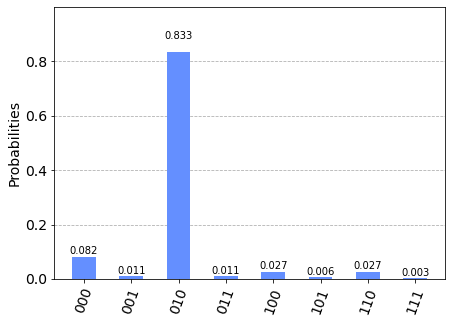

In [23]:
ibm_result.plot_counts()

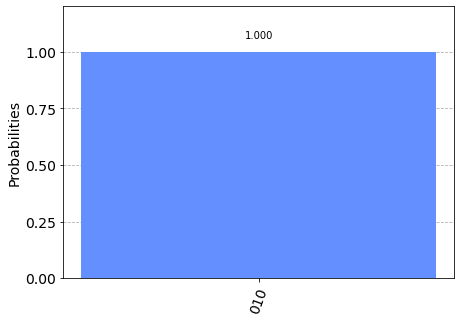

In [24]:
aws_result.plot_counts()

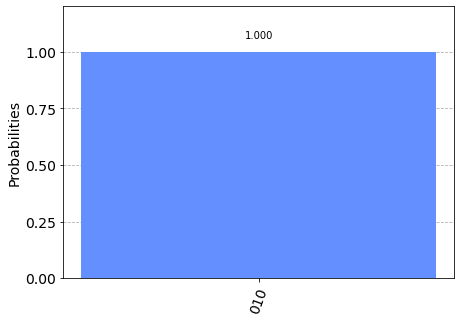

In [25]:
google_result.plot_counts()